In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import seaborn as sns
from sklearn.metrics import accuracy_score,mean_squared_error,f1_score,classification_report
from sklearn.feature_selection import SelectKBest,chi2,RFE
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,IsolationForest
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB,MultinomialNB,ComplementNB,BernoulliNB
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler

In [2]:
train=pd.read_csv('train_(churn).csv')
train

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1
...,...,...,...,...,...,...,...,...,...,...,...
6645,a8216afd,61,Male,5L - 10L,1354526.19,4,1,2,1,Poor,1
6646,153a306b,42,Female,5L - 10L,596286.54,3,1,2,1,Average,0
6647,d4075a95,29,Male,Less than 5L,979298.19,2,0,2,0,Poor,0
6648,5855b142,66,Female,10L - 15L,395233.65,3,0,2,1,Poor,1


In [3]:
test=pd.read_csv('test_(churn).csv')
test

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average
2,a5034a09,25,Female,10L - 15L,439460.10,0,0,2,1,Good
3,b3256702,41,Male,Less than 5L,28581.93,0,1,2,1,Poor
4,dc28adb5,48,Male,More than 15L,1104540.03,2,1,3+,0,Good
...,...,...,...,...,...,...,...,...,...,...
2846,19e40adf,40,Female,10L - 15L,1338458.22,0,0,1,1,Poor
2847,52d5bc8d,48,Female,More than 15L,1448280.27,0,1,2,1,Average
2848,f708121b,59,Male,More than 15L,1100555.64,3,0,1,1,Poor
2849,f008715d,34,Female,5L - 10L,1502818.92,2,0,1,1,Poor


In [4]:
combine=[train,test]

In [5]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 20, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 31), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 31) & (dataset['Age'] <= 40), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 51), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 51) & (dataset['Age'] <= 61), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 61) & (dataset['Age'] <= 71), 'Age'] = 5
    dataset.loc[ dataset['Age'] >71, 'Age'] = 6
train.head(10)

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,2,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,4,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,2,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,3,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,2,Female,More than 15L,893146.23,1,1,1,1,Good,1
5,e7a8332a,1,Female,Less than 5L,111026.79,4,1,1,0,Good,0
6,f2de1836,4,Male,Less than 5L,1072102.23,2,1,2,1,Average,0
7,f422388a,3,Female,10L - 15L,1587489.75,4,0,1,1,Poor,1
8,773aa149,4,Female,10L - 15L,1465812.54,0,0,1,1,Poor,1
9,443be80f,2,Female,5L - 10L,770796.81,3,0,1,1,Poor,0


In [6]:
train['Age'].unique()

array([2, 4, 3, 1, 5, 6], dtype=int64)

In [7]:
test_index=test.ID
len(test_index)

2851

In [8]:
train['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [9]:
train['Income'].unique()

array(['5L - 10L', 'Less than 5L', 'More than 15L', '10L - 15L'],
      dtype=object)

In [10]:
train['Credit_Category'].unique()

array(['Average', 'Poor', 'Good'], dtype=object)

In [11]:
train['Product_Holdings'].unique()

array(['1', '2', '3+'], dtype=object)

In [12]:
train['Is_Churn'].value_counts()

0    5113
1    1537
Name: Is_Churn, dtype: int64

<AxesSubplot:>

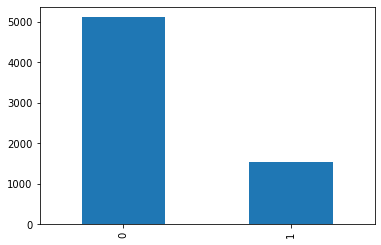

In [13]:
train['Is_Churn'].value_counts().plot(kind='bar')

In [14]:
(train['Is_Churn'].value_counts()/train['Is_Churn'].shape)*100

0    76.887218
1    23.112782
Name: Is_Churn, dtype: float64

In [15]:
train.dtypes

ID                     object
Age                     int64
Gender                 object
Income                 object
Balance               float64
Vintage                 int64
Transaction_Status      int64
Product_Holdings       object
Credit_Card             int64
Credit_Category        object
Is_Churn                int64
dtype: object

In [16]:
train.isna().sum()

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64

In [17]:
categorical=train.select_dtypes(include='object').columns
categorical

Index(['ID', 'Gender', 'Income', 'Product_Holdings', 'Credit_Category'], dtype='object')

In [18]:
le=LabelEncoder()

In [19]:
for i in categorical:
    train[i]=pd.get_dummies(train[i])
    test[i]=pd.get_dummies(test[i])
 

In [20]:
train.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,0,2,1,0,563266.44,4,0,1,0,1,1
1,0,4,1,0,875572.11,2,1,1,1,0,0
2,0,2,1,0,701607.06,2,1,0,0,0,0
3,0,3,1,0,1393922.16,0,1,0,1,0,1
4,0,2,1,0,893146.23,1,1,1,1,0,1


In [21]:
x=train.drop(['ID','Is_Churn'],axis=1)
y=train.Is_Churn

In [22]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=9)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                Specs         Score
3             Balance  6.987321e+06
0                 Age  1.071825e+02
5  Transaction_Status  2.432590e+01
1              Gender  1.037290e+01
6    Product_Holdings  3.784519e+00
4             Vintage  2.553496e+00
2              Income  2.068487e-01
8     Credit_Category  3.927646e-03
7         Credit_Card  1.605464e-03


In [23]:
model=RandomForestClassifier(random_state=100)

In [24]:
rfe=RFE(model,4)
fit_rfe=rfe.fit(x,y)

D:\New folder\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [25]:
print(('num features: %d')%fit_rfe.n_features_)
print(('num selected feature: %s')%fit_rfe.support_)
print(('feature ranking: %s')%fit_rfe.ranking_)

num features: 4
num selected feature: [ True False False  True  True False False False  True]
feature ranking: [1 5 2 1 1 6 4 3 1]


In [26]:
names=x.columns

In [27]:
feature_names=dict(zip(names,fit_rfe.ranking_))
feature_names

{'Age': 1,
 'Gender': 5,
 'Income': 2,
 'Balance': 1,
 'Vintage': 1,
 'Transaction_Status': 6,
 'Product_Holdings': 4,
 'Credit_Card': 3,
 'Credit_Category': 1}

In [28]:
train.isna().sum()

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64

In [29]:
new_X=train.drop(['ID','Credit_Card','Credit_Category','Vintage','Is_Churn','Income',],axis=1)
new_y=train.Is_Churn

In [30]:
test=test.drop(['ID','Credit_Category','Credit_Card','Vintage','Income',],axis=1)

In [31]:
trainx,testx,trainy,testy=train_test_split(new_X,new_y,test_size=0.2,random_state=50)

## SMOTE

In [32]:
print("Before OverSampling, counts of label '1': {}".format(sum(trainy == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(trainy == 0)))
  
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state =63)
trainx_res,trainy_res = sm.fit_resample(trainx,trainy.ravel())  
print('After OverSampling, the shape of train_X: {}'.format(trainx_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(trainy_res.shape))
  

print("After OverSampling, counts of label '1': {}".format(sum(trainy_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(trainy_res == 0)))

Before OverSampling, counts of label '1': 1217
Before OverSampling, counts of label '0': 4103 

After OverSampling, the shape of train_X: (8206, 5)
After OverSampling, the shape of train_y: (8206,) 

After OverSampling, counts of label '1': 4103
After OverSampling, counts of label '0': 4103


In [33]:
#creating the objects
logreg_cv = LogisticRegression(solver='liblinear',random_state=42)
dt_cv=DecisionTreeClassifier(random_state=123)
knn_cv=KNeighborsClassifier()

nb_cv=GaussianNB()
rf_cv=RandomForestClassifier(random_state=123)
et_cv=ExtraTreesClassifier(random_state=123)
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'Naive Bayes',4:'Random Forest',5:'ExtraTrees'}
cv_models=[logreg_cv,dt_cv,knn_cv,nb_cv,rf_cv,et_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model,trainx_res,trainy_res, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.5
Decision Tree Test Accuracy: 0.7181509759068359
KNN Test Accuracy: 0.6286877989364547
Naive Bayes Test Accuracy: 0.5214463325510235
Random Forest Test Accuracy: 0.7121772971688305
ExtraTrees Test Accuracy: 0.7113249754909242


In [39]:
logreg=LogisticRegression(random_state=42)

In [40]:
logreg.fit(trainx_res,trainy_res)

LogisticRegression(random_state=42)

In [41]:
logreg_pred=logreg.predict(testx)

In [42]:
print('f1_score -',f1_score(testy,logreg_pred,average='macro'))
print('Accuracy_score -',accuracy_score(testy,logreg_pred))
print('Mean_squared_error -',mean_squared_error(testy,logreg_pred))

f1_score - 0.19393939393939394
Accuracy_score - 0.24060150375939848
Mean_squared_error - 0.7593984962406015


## RandomForestClassifier

In [43]:
rf=RandomForestClassifier(random_state=49)

In [44]:
rf.fit(trainx_res,trainy_res)
rf_pred=rf.predict(testx)


In [45]:
print('f1_score -',f1_score(testy,rf_pred,average='macro'))
print('Accuracy_score -',accuracy_score(testy,rf_pred))
print('Mean_squared_error -',mean_squared_error(testy,rf_pred))

f1_score - 0.5187442624684243
Accuracy_score - 0.6037593984962406
Mean_squared_error - 0.3962406015037594


In [46]:
param_grid={'n_estimators':[470,480,500],'max_depth':[2,3,4],
'min_samples_split':[2,3,4],'min_samples_leaf':[1,2],'max_leaf_nodes':[3,4],'max_samples':[3,4,5],
            'min_weight_fraction_leaf':[0.0,0.1],
    'min_impurity_decrease':[0.0,0.1],
    'min_impurity_split':[0.1,0.2]}

In [51]:
grid=GridSearchCV(estimator=rf,param_grid=param_grid,n_jobs=-1,cv=2,verbose=2)

In [52]:
grid.fit(trainx_res,trainy_res)

Fitting 2 folds for each of 2592 candidates, totalling 5184 fits


D:\New folder\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
D:\New folder\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
D:\New folder\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
D:\New folder\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impuri

D:\New folder\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
D:\New folder\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
D:\New folder\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
D:\New folder\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impuri

D:\New folder\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
D:\New folder\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
D:\New folder\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
D:\New folder\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impuri

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=49), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4], 'max_leaf_nodes': [3, 4],
                         'max_samples': [3, 4, 5],
                         'min_impurity_decrease': [0.0, 0.1],
                         'min_impurity_split': [0.1, 0.2],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4],
                         'min_weight_fraction_leaf': [0.0, 0.1],
                         'n_estimators': [470, 480, 500]},
             verbose=2)

In [53]:
grid.best_params_

{'max_depth': 3,
 'max_leaf_nodes': 4,
 'max_samples': 5,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': 0.1,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 480}

In [63]:
rf_grid=RandomForestClassifier(criterion= 'gini',max_depth=3,max_leaf_nodes=4,max_samples=5,min_samples_leaf=3,
                               min_samples_split=4,n_estimators=480,random_state=8)


In [64]:
rf_grid.fit(trainx_res,trainy_res)
rf_grid_predict=rf_grid.predict(testx)

In [65]:
print('f1_score -',f1_score(testy,rf_grid_predict,average='macro'))
print('Accuracy_score -',accuracy_score(testy,rf_grid_predict))
print('Mean_squared_error -',mean_squared_error(testy,rf_grid_predict))

f1_score - 0.43162393162393164
Accuracy_score - 0.7593984962406015
Mean_squared_error - 0.24060150375939848


## DecisionTreeClassifier

In [66]:
dc=DecisionTreeClassifier(random_state=42)
dc.fit(trainx_res,trainy_res)
dc_pred=dc.predict(testx)


In [67]:
print('f1_score -',f1_score(testy,dc_pred,average='macro'))
print('Accuracy_score -',accuracy_score(testy,dc_pred))
print('Mean_squared_error -',mean_squared_error(testy,dc_pred))

f1_score - 0.5057910680883493
Accuracy_score - 0.6007518796992481
Mean_squared_error - 0.39924812030075185


In [68]:
dc_param_grid={'splitter':["best", "random"],'criterion':['gini','entropy'],'max_depth':[1,2,3],
'min_samples_split':[1,2,3],'min_samples_leaf':[1,2,3],'max_leaf_nodes':[1,2,3]}

In [69]:
dc.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [70]:
dc_grid=GridSearchCV(estimator=dc,param_grid=dc_param_grid,n_jobs=-1,cv=5,verbose=2)
dc_grid.fit(trainx_res,trainy_res)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


D:\New folder\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.63576345 0.63576345 0.63576345 0.63576345
        nan        nan 0.63576345 0.63576345 0.63576345 0.63576345
        nan        nan 0.63576345 0.63576345 0.63576345 0.63576345
        nan        nan 0.63576345 0.63576345 0.63576345 0.63576345
        nan        nan 0.63576345 0.63576345 0.63576345 0.63576345
        nan        nan 0.63576345 0.63576345 0.63576345 0.63576345
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.63576345 0.63576345 0.63576345 0.635763

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3], 'max_leaf_nodes': [1, 2, 3],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'splitter': ['best', 'random']},
             verbose=2)

In [71]:
dc_grid.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'max_leaf_nodes': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [73]:
dc_final=DecisionTreeClassifier(criterion= 'gini', max_depth=2,max_leaf_nodes=3,min_samples_leaf= 1,
min_samples_split= 2,splitter='best',random_state=42)

In [74]:
dc_final.fit(trainx_res,trainy_res)
dc_final_pred=dc_final.predict(testx)

In [75]:
print('f1_score -',f1_score(testy,dc_final_pred,average='macro'))
print('Accuracy_score -',accuracy_score(testy,dc_final_pred))
print('Mean_squared_error -',mean_squared_error(testy,dc_final_pred))

f1_score - 0.5557332137517903
Accuracy_score - 0.6157894736842106
Mean_squared_error - 0.38421052631578945


## Support Vector Machines

In [76]:
svc=SVC(random_state=43)
svc.fit(trainx_res,trainy_res)
svc_pred=svc.predict(testx)

In [77]:
print('f1_score -',f1_score(testy,svc_pred,average='macro'))
print('Accuracy_score -',accuracy_score(testy,svc_pred))
print('Mean_squared_error -',mean_squared_error(testy,svc_pred))

f1_score - 0.5357894736842105
Accuracy_score - 0.6210526315789474
Mean_squared_error - 0.37894736842105264


## Naive Bayes

### GaussianNB

In [78]:
g_model=GaussianNB()
g_model.fit(trainx_res,trainy_res)
g_model_pred=g_model.predict(testx)

In [79]:
print('f1_score -',f1_score(testy,g_model_pred,average='macro'))
print('Accuracy_score -',accuracy_score(testy,g_model_pred))
print('Mean_squared_error -',mean_squared_error(testy,g_model_pred))

f1_score - 0.5410006663321733
Accuracy_score - 0.6090225563909775
Mean_squared_error - 0.39097744360902253


## XGBClassifier

In [80]:
from xgboost import XGBClassifier

In [81]:
xgb=XGBClassifier()

In [82]:
xgb.fit(trainx_res,trainy_res)
xgb_pred=g_model.predict(testx)

D:\New folder\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:06:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [83]:
print('f1_score -',f1_score(testy,xgb_pred,average='macro'))
print('Accuracy_score -',accuracy_score(testy,xgb_pred))
print('Mean_squared_error -',mean_squared_error(testy,xgb_pred))

f1_score - 0.5410006663321733
Accuracy_score - 0.6090225563909775
Mean_squared_error - 0.39097744360902253


## AdaBoostClassifier

In [84]:
from sklearn.ensemble import AdaBoostClassifier

In [85]:
adc=AdaBoostClassifier(n_estimators=300, algorithm = "SAMME", learning_rate = 0.9, random_state= 72)

In [86]:
adc.fit(trainx_res,trainy_res)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.9, n_estimators=300,
                   random_state=72)

In [87]:
adc_pred=adc.predict(testx)

In [88]:
print('f1_score -',f1_score(testy,adc_pred,average='macro'))
print('Accuracy_score -',accuracy_score(testy,adc_pred))
print('Mean_squared_error -',mean_squared_error(testy,adc_pred))

f1_score - 0.5426246982388935
Accuracy_score - 0.6225563909774436
Mean_squared_error - 0.3774436090225564


In [90]:
rf_test_pred=rf_grid.predict(test)
rf_final_submission=pd.DataFrame({'Is_Churn':rf_test_pred},index=[test_index])

In [91]:
rf_file_name='rf_churn.csv'
rf_final_submission.to_csv(rf_file_name)